# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [1]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

# import the function to add some noise
from skimage.util import random_noise


In [2]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

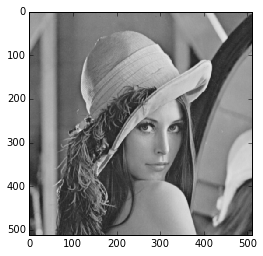

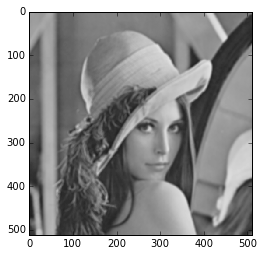

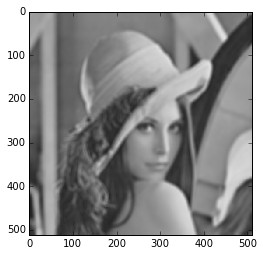

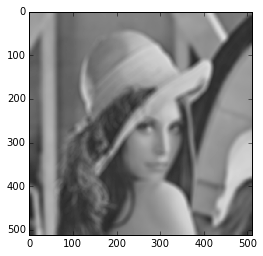

In [15]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean
plt.figure()
luca = mean(lena_im, disk(1))
io.imshow(luca)
plt.show()
luca1 = mean(lena_im, disk(3))
io.imshow(luca1)
plt.show()
luca2 = mean(lena_im, disk(5))
io.imshow(luca2)
plt.show()
luca3 = mean(lena_im, disk(7))
io.imshow(luca3)
plt.show()

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

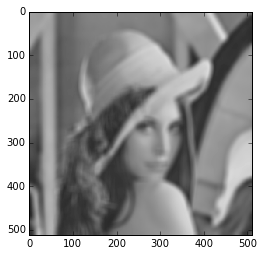

In [28]:
from scipy import ndimage
matlucamean = 1./(14*14)*np.ones((14,14))
luca1con = ndimage.convolve(lena_im, matlucamean,)
io.imshow(luca1con)

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [29]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

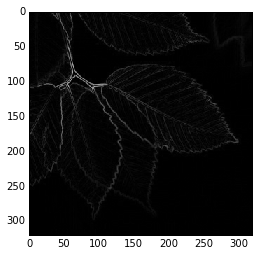

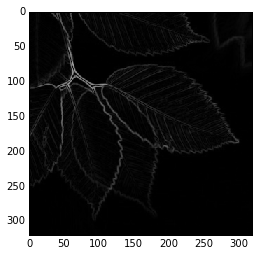

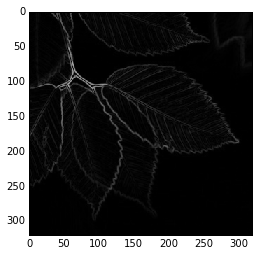

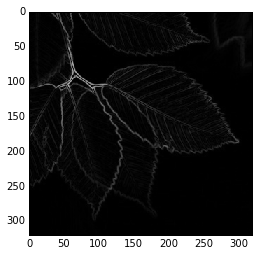

In [36]:
leaveslu = io.imread(Path.__add__('leaves.jpg'))
leaveslu = img_as_float(color.rgb2gray(leaveslu))
plt.figure()
lu1 = filters.roberts(leaveslu)
io.imshow(lu1)
plt.show()
lu2 = filters.prewitt(leaveslu)
io.imshow(lu2)
plt.show()
lu3 = filters.sobel(leaveslu)
io.imshow(lu3)
plt.show()
lu4 = filters.scharr(leaveslu)
io.imshow(lu4)
plt.show()

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

/home/masters/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


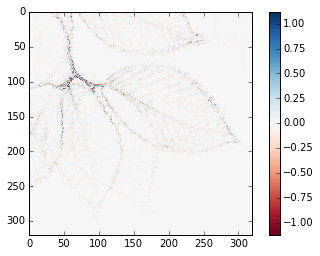

In [43]:
from scipy.ndimage import filters

lu5 = filters.laplace(leaveslu)
io.imshow(lu5)

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [44]:
from skimage import util

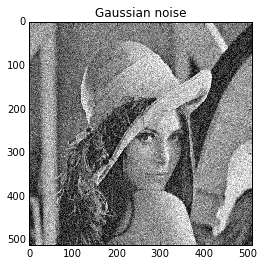

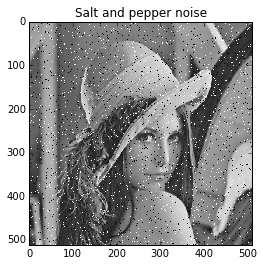

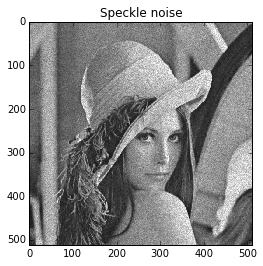

In [45]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

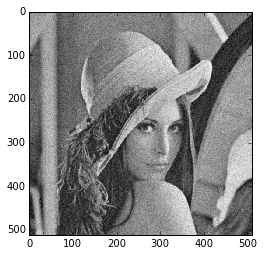

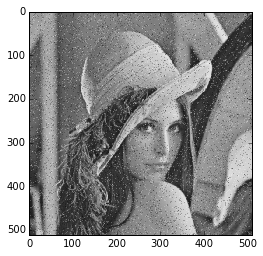

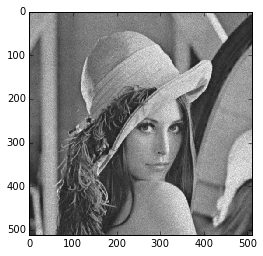

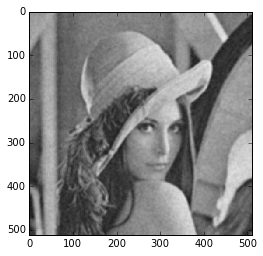

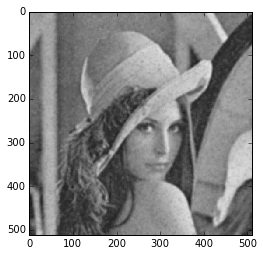

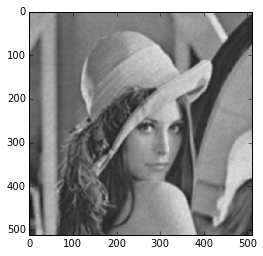

In [54]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean_percentile
fillu1 = 1./4*np.ones((2,2))
fillu2 = 1./36*np.ones((6,6))
plt.figure()
lu6 = mean(lena_gaussian, fillu1)
io.imshow(lu6)
plt.show()
lu7 = mean(lena_sp, fillu1)
io.imshow(lu7)
plt.show()
lu8 = mean(lena_speckle, fillu1)
io.imshow(lu8)
plt.show()
lu9 = mean(lena_gaussian, fillu2)
io.imshow(lu9)
plt.show()
lu10 = mean(lena_sp, fillu2)
io.imshow(lu10)
plt.show()
lu11 = mean(lena_speckle, fillu2)
io.imshow(lu11)
plt.show()


** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

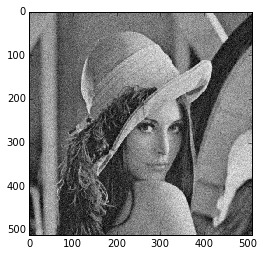

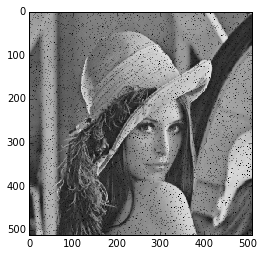

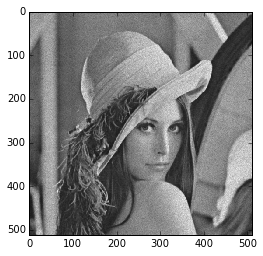

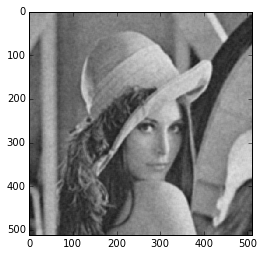

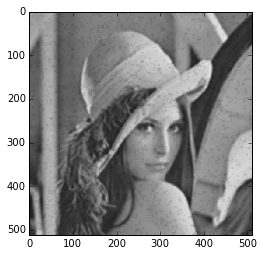

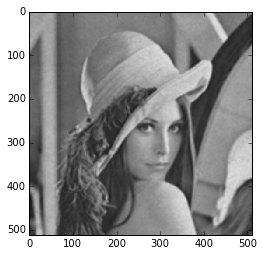

In [57]:
plt.figure()
lu12 = mean_percentile(lena_gaussian, fillu1, p0=0.05, p1=0.95)
io.imshow(lu12)
plt.show()
lu13 = mean_percentile(lena_sp, fillu1, p0=0.05, p1=0.95)
io.imshow(lu13)
plt.show()
lu14 = mean_percentile(lena_speckle, fillu1, p0=0.05, p1=0.95)
io.imshow(lu14)
plt.show()
lu15 = mean_percentile(lena_gaussian, fillu2, p0=0.05, p1=0.95)
io.imshow(lu15)
plt.show()
lu16 = mean_percentile(lena_sp, fillu2, p0=0.05, p1=0.95)
io.imshow(lu16)
plt.show()
lu17 = mean_percentile(lena_speckle, fillu2, p0=0.05, p1=0.95)
io.imshow(lu17)
plt.show()

** median filter: **

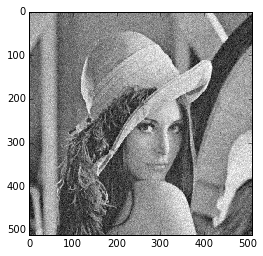

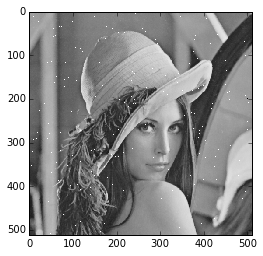

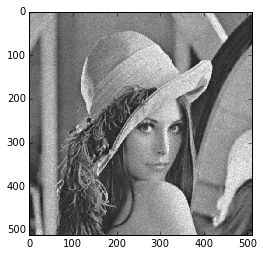

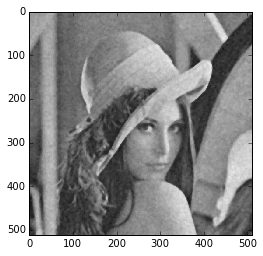

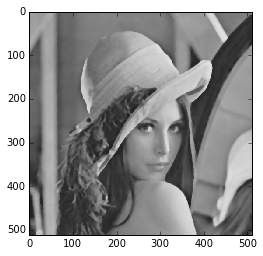

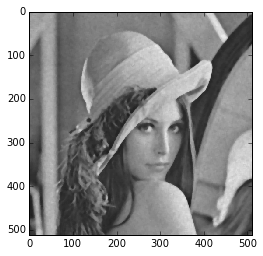

In [58]:
from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median
plt.figure()
lu18 = median(lena_gaussian, fillu1)
io.imshow(lu18)
plt.show()
lu19 = median(lena_sp, fillu1)
io.imshow(lu19)
plt.show()
lu20 = median(lena_speckle, fillu1)
io.imshow(lu20)
plt.show()
lu21 = median(lena_gaussian, fillu2)
io.imshow(lu21)
plt.show()
lu22 = median(lena_sp, fillu2)
io.imshow(lu22)
plt.show()
lu23 = median(lena_speckle, fillu2)
io.imshow(lu23)
plt.show()

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

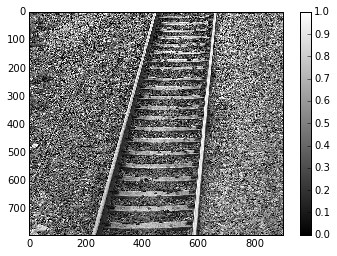

In [63]:
railu = io.imread(Path.__add__('railway.jpg'))
railu = img_as_float(color.rgb2gray(railu))
luc1 = filters.laplace(railu)


sharp= railu-luc1
io.imshow(sharp, cmap='gray', vmin=0., vmax=1.)

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**